In [12]:
import numpy as np
import scipy as sc
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from IPython.display import display, HTML

pd.set_option('display.max_columns', None)
pd.set_option('display.width', None)
dataset = pd.read_csv("live_sellers.csv")

# strip the empty columns from the set
del dataset['Column1']
del dataset['Column2']
del dataset['Column3']
del dataset['Column4']

# sort data by status_type with 'status' first, then 'photo' then 'video' and finally 'link'
dataset['status_type'] = pd.Categorical(dataset['status_type'], categories=['status', 'photo', 'video', 'link'], ordered=True)
sorted_dataset = dataset.sort_values(by=['status_type'])
# puts a scrollbar next to the table
display(HTML("<div style='max-height: 500px; overflow-y: scroll;'><div style='max-height: 500px; overflow-y: scroll;'>"+sorted_dataset.to_html()+"</div></div>"))

,status_id,status_type,status_published,num_reactions,num_comments,num_shares,num_likes,num_loves,num_wows,num_hahas,num_sads,num_angrys
2656,2657,status,6/8/2018 5:57,76,1,1,75,1,0,0,0,0
4626,4627,status,3/25/2018 3:59,234,10,0,231,3,0,0,0,0
1106,1107,status,9/10/2015 5:22,2244,11,0,2244,0,0,0,0,0
2852,2853,status,4/24/2018 8:17,65,9,0,65,0,0,0,0,0
2044,2045,status,1/2/2013 9:06,30,23,4,30,0,0,0,0,0
935,936,status,2/2/2016 1:32,42,9,0,42,0,0,0,0,0
4612,4613,status,3/28/2018 5:26,1511,311,4,1468,10,33,0,0,0
3041,3042,status,3/6/2018 10:05,82,14,0,78,3,0,0,1,0
4609,4610,status,3/30/2018 1:46,1394,239,7,1365,8,21,0,0,0
1117,1118,status,8/29/2015 2:39,1042,8,0,1042,0,0,0,0,0


### Correlation Matrix

In [88]:
# strip the columns that are not needed
stripped_dataset = dataset[['num_reactions', 'num_comments', 'num_shares', 'num_likes', 'num_loves', 'num_wows', 'num_hahas', 'num_sads', 'num_angrys']]

stripped_dataset = stripped_dataset.corr()
# highlight the diagonal row of 1's in the correlation matrix
stripped_dataset


,num_reactions,num_comments,num_shares,num_likes,num_loves,num_wows,num_hahas,num_sads,num_angrys
num_reactions,1.000000,0.150843,0.250723,0.994923,0.305003,0.267752,0.176028,0.075138,0.124326
num_comments,0.150843,1.000000,0.640637,0.101687,0.521223,0.162394,0.325048,0.236453,0.225184
num_shares,0.250723,0.640637,1.000000,0.172492,0.820000,0.407628,0.399826,0.199970,0.312513
num_likes,0.994923,0.101687,0.172492,1.000000,0.209308,0.207800,0.120784,0.052169,0.087431
num_loves,0.305003,0.521223,0.820000,0.209308,1.000000,0.508798,0.507830,0.207600,0.371001
num_wows,0.267752,0.162394,0.407628,0.207800,0.508798,1.000000,0.287756,0.086503,0.183087
num_hahas,0.176028,0.325048,0.399826,0.120784,0.507830,0.287756,1.000000,0.141421,0.211910
num_sads,0.075138,0.236453,0.199970,0.052169,0.207600,0.086503,0.141421,1.000000,0.142072
num_angrys,0.124326,0.225184,0.312513,0.087431,0.371001,0.183087,0.211910,0.142072,1.000000


Correlations:
* reactions vs comments (.150843)
* likes vs reactions (.994923)
* shares vs loves (.820000)
* shares vs comments (.640637)
* loves vs wows (.508798)
* loves vs hahas (.507830)
* wows vs hahas (.287756)
* likes vs comments (.101687)


In [14]:
print(
    '\nNUM_LIKES null?: ', stripped_dataset['num_likes'].isnull().values.any(), 
    'NUM_REACTIONS null?: ', stripped_dataset['num_reactions'].isnull().values.any(), 
    'NUM_SHARES null?: ', stripped_dataset['num_shares'].isnull().values.any(),
    'NUM_COMMENTS null?: ', stripped_dataset['num_comments'].isnull().values.any(),
)

stripped_dataset['num_reactions'] = stripped_dataset['num_reactions'].fillna(stripped_dataset['num_reactions'].mean())
print(
    '\nNaN filled',
    '\nNUM_REACTIONS still null?: ', stripped_dataset['num_reactions'].isnull().values.any())

# assign independent and dependent variables
x = stripped_dataset['num_reactions']
y = stripped_dataset['num_likes']

x2 = stripped_dataset['num_shares']
y2 = stripped_dataset['num_comments']

x3 = stripped_dataset['num_likes']
y3 = stripped_dataset['num_comments']


NUM_LIKES null?:  False NUM_REACTIONS null?:  False NUM_SHARES null?:  False NUM_COMMENTS null?:  False

NaN filled 
NUM_REACTIONS still null?:  False


In [15]:
slope1, intercept1, rvalue1, pvalue1, stderr1 = sc.stats.linregress(x, y)
fit1 = [slope1, intercept1]

slope2, intercept2, rvalue2, pvalue2, stderr2 = sc.stats.linregress(x2, y2)
fit2 = [slope2, intercept2]

slope3, intercept3, rvalue3, pvalue3, stderr3 = sc.stats.linregress(x3, y3)
fit3 = [slope3, intercept3]

print('\nFit 1 (NUM_LIKES vs NUM_REACTIONS)',
      '\nslope:\t\t\t', slope1,
      '\ny-intercept:\t', intercept1,
      '\nR value:\t\t', rvalue1,
      '\nR-squared:\t\t', pow(rvalue1, 2),
      '\nP value:\t\t', pvalue1,
      '\nstd err:\t\t', stderr1,
      '\nRegression line:\t', 'y = ', slope1, 'x + ', intercept1,
      '\nfit:\t\t\t', fit1,
)

print('\nFit 2 (NUM_COMMENTS vs NUM_SHARES)',
      '\nslope:\t\t\t', slope2,
      '\ny-intercept:\t', intercept2,
      '\nR value:\t\t', rvalue2,
      '\nR-squared:\t\t', pow(rvalue2, 2),
      '\nP value:\t\t', pvalue2,
      '\nstd err:\t\t', stderr2,
      '\nRegression line:\t', 'y = ', slope2, 'x + ', intercept2,
      '\nfit:\t\t\t', fit2,
)

print('\nFit 3 (NUM_COMMENTS vs NUM_LIKES)',
      '\nslope:\t\t\t', slope3,
      '\ny-intercept:\t', intercept3,
      '\nR value:\t\t', rvalue3,
      '\nR-squared:\t\t', pow(rvalue3, 2),
      '\nP value:\t\t', pvalue3,
      '\nstd err:\t\t', stderr3,
      '\nRegression line:\t', 'y = ', slope3, 'x + ', intercept3,
      '\nfit:\t\t\t', fit3,
)


Fit 1 (NUM_LIKES vs NUM_REACTIONS) 
slope:			 1.0568328667700557 
y-intercept:	 -0.0653592108289453 
R value:		 0.9977556077661739 
R-squared:		 0.995516252828847 
P value:		 1.7596839123952976e-09 
std err:		 0.0268073368500963 
Regression line:	 y =  1.0568328667700557 x +  -0.0653592108289453 
fit:			 [1.0568328667700557, -0.0653592108289453]

Fit 2 (NUM_COMMENTS vs NUM_SHARES) 
slope:			 0.750210875444783 
y-intercept:	 0.023304706584167112 
R value:		 0.7386726385621241 
R-squared:		 0.5456372669603303 
P value:		 0.02300746146985325 
std err:		 0.2587519758315182 
Regression line:	 y =  0.750210875444783 x +  0.023304706584167112 
fit:			 [0.750210875444783, 0.023304706584167112]

Fit 3 (NUM_COMMENTS vs NUM_LIKES) 
slope:			 -0.3594260509794312 
y-intercept:	 0.49139470396436613 
R value:		 -0.467163176883313 
R-squared:		 0.21824143383570957 
P value:		 0.2048393831078744 
std err:		 0.2571154964562893 
Regression line:	 y =  -0.3594260509794312 x +  0.49139470396436613 
fit:		

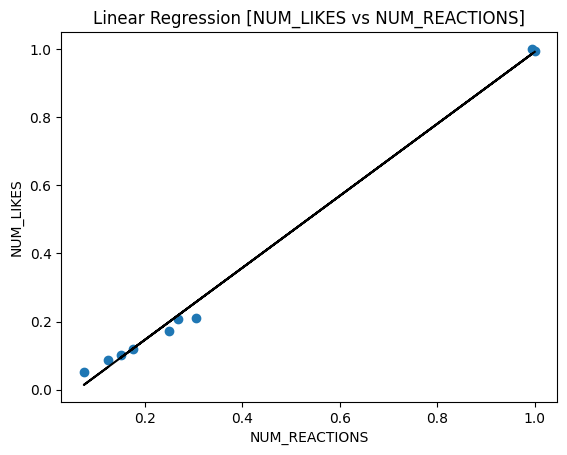

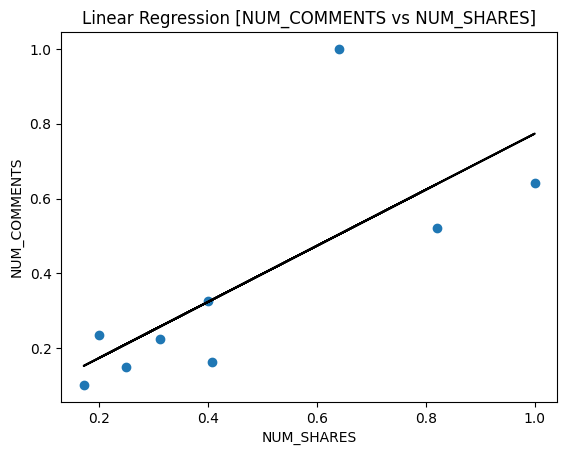

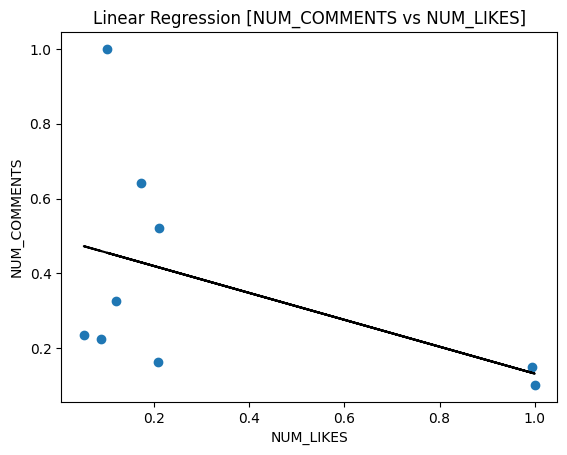

In [16]:
# plot given values and regression prediction line
plt.plot(x, y, 'o', label='original data')
plt.plot(x, fit1[0] * x + fit1[1], 'black', label='fitted line')
plt.xlabel('NUM_REACTIONS')
plt.ylabel('NUM_LIKES')
plt.title('Linear Regression [NUM_LIKES vs NUM_REACTIONS]')
plt.show()

plt.plot(x2, y2, 'o', label='original data')
plt.plot(x2, fit2[0] * x2 + fit2[1], 'black', label='fitted line')
plt.xlabel('NUM_SHARES')
plt.ylabel('NUM_COMMENTS')
plt.title('Linear Regression [NUM_COMMENTS vs NUM_SHARES]')
plt.show()

plt.plot(x3, y3, 'o', label='original data')
plt.plot(x3, fit3[0] * x3 + fit3[1], 'black', label='fitted line')
plt.xlabel('NUM_LIKES')
plt.ylabel('NUM_COMMENTS')
plt.title('Linear Regression [NUM_COMMENTS vs NUM_LIKES]')
plt.show()

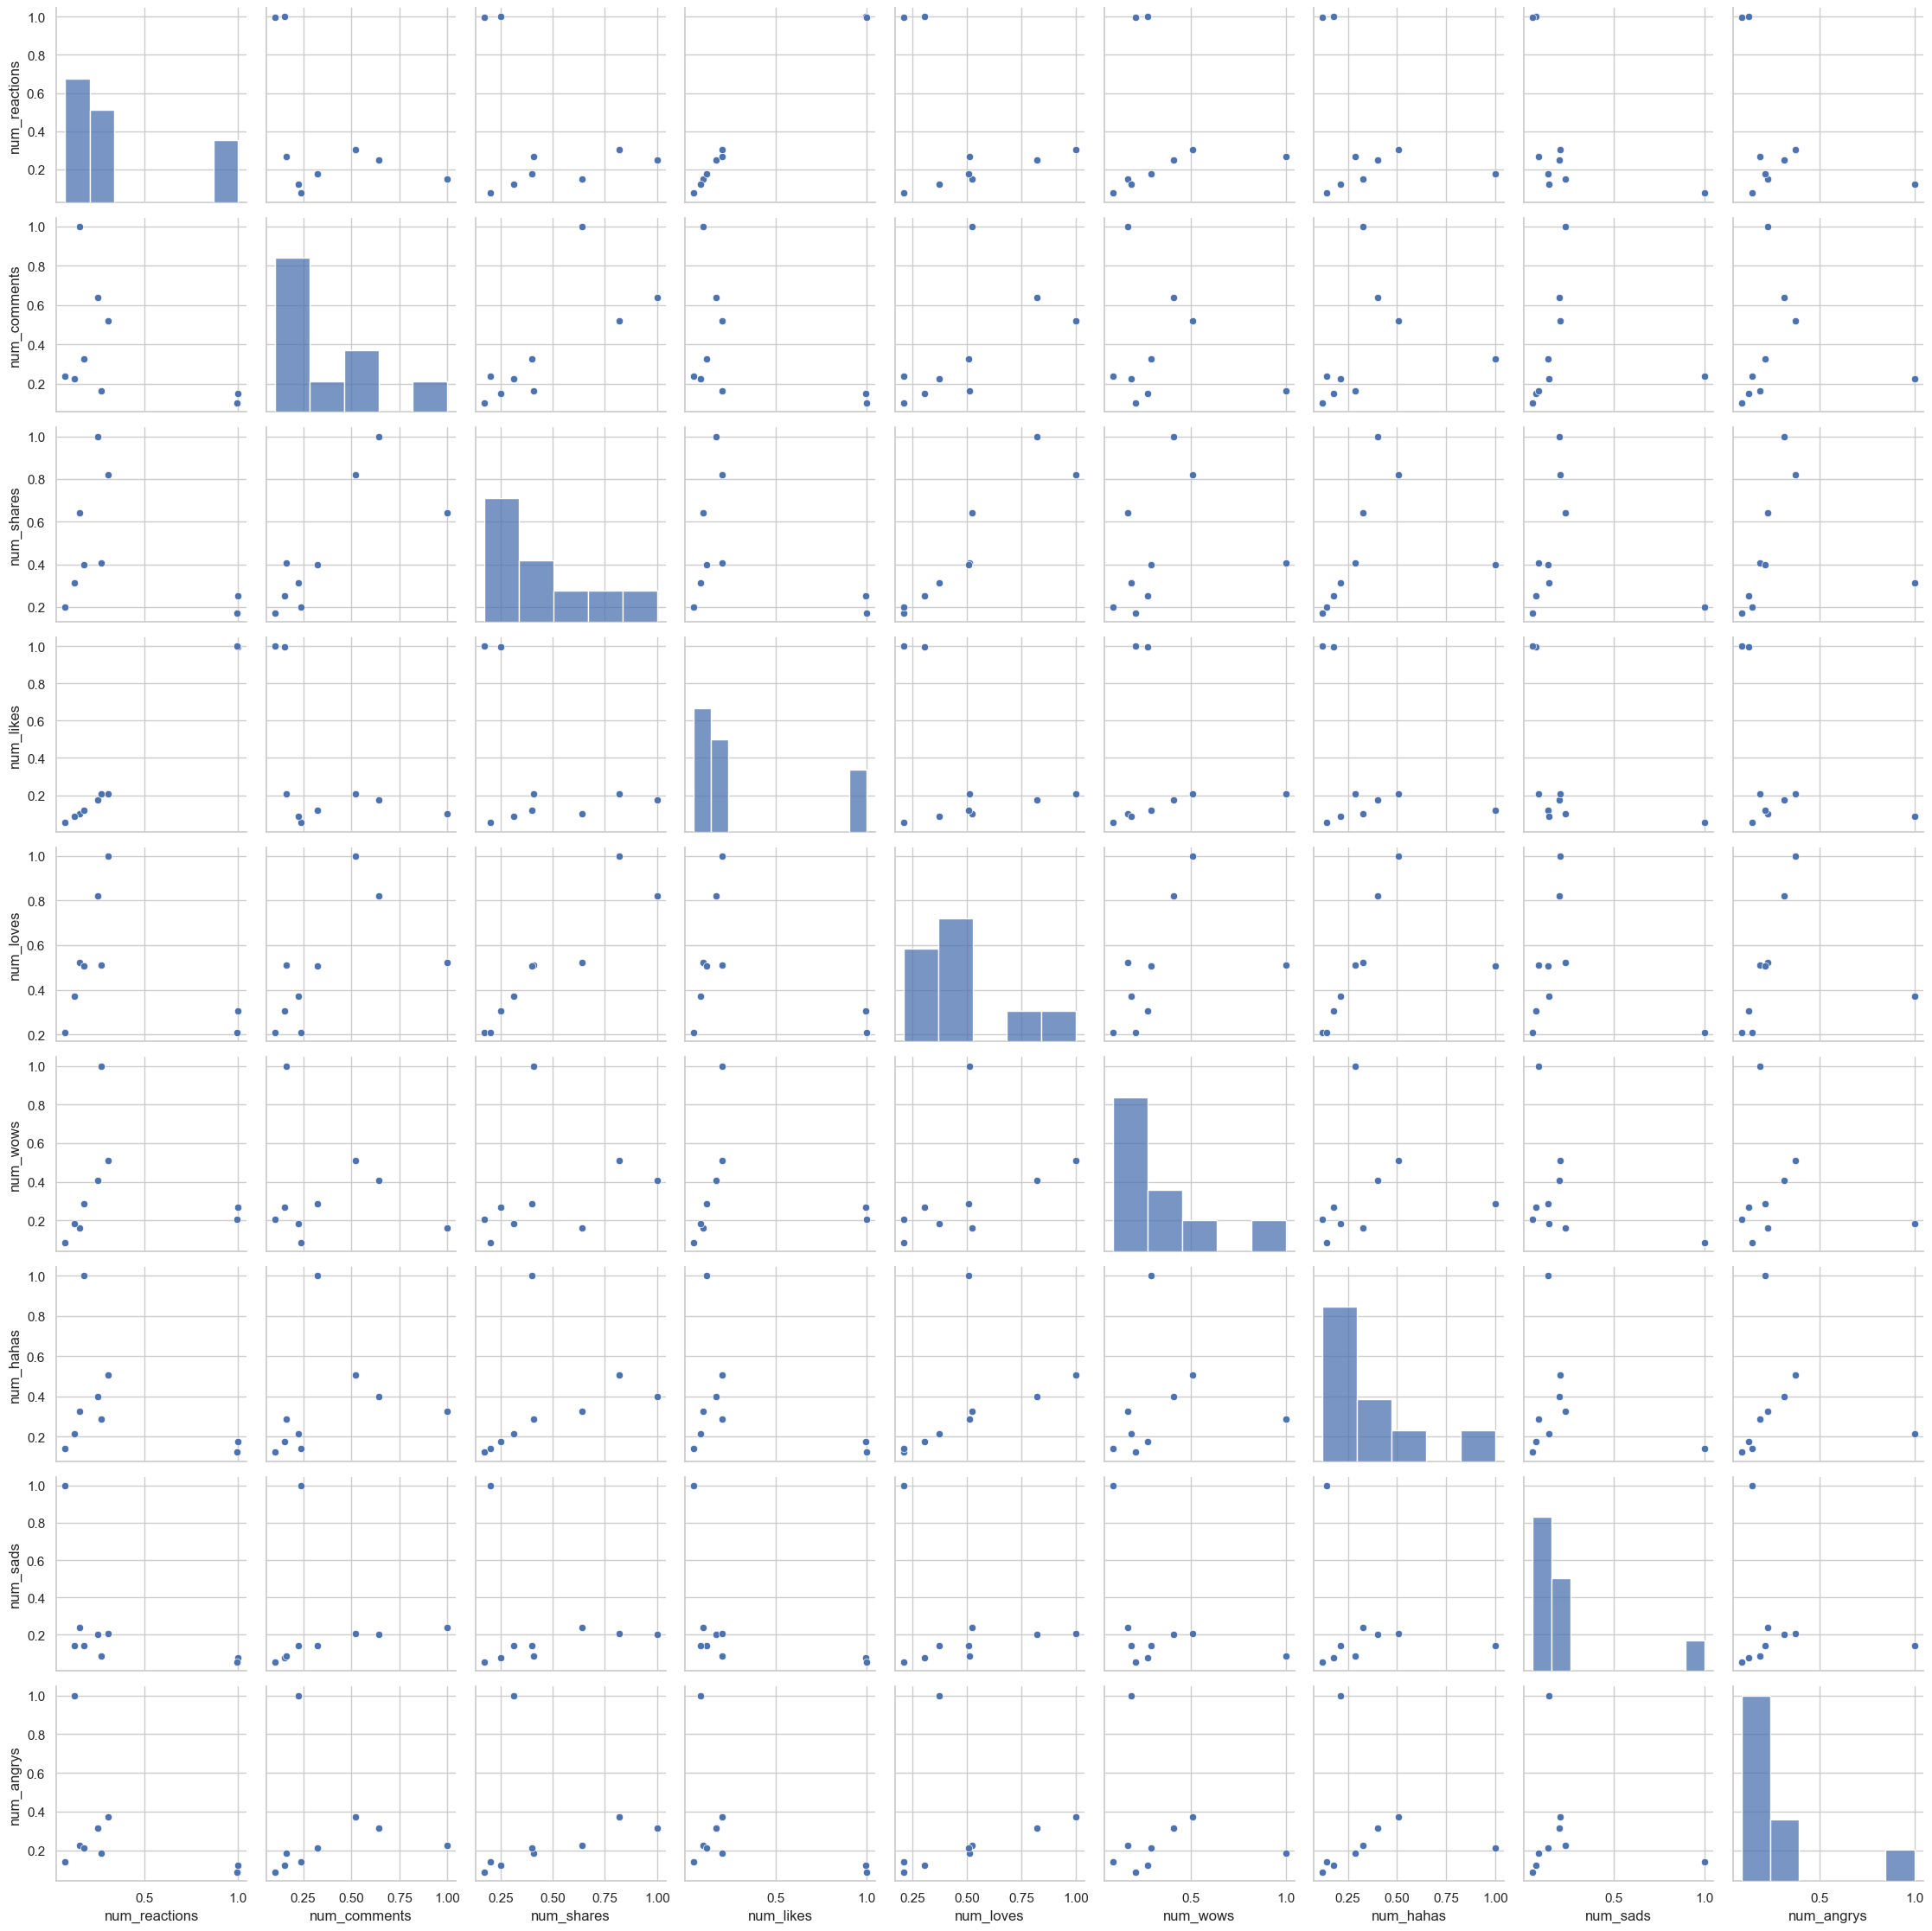

In [19]:
sns.set(style="whitegrid", context="notebook")
cols = ['num_reactions', 'num_comments', 'num_shares', 'num_likes', 'num_loves', 'num_wows', 'num_hahas', 'num_sads', 'num_angrys']

sns.pairplot(stripped_dataset[cols], height=2.5)
plt.tight_layout()
plt.show()
sns.reset_orig()

#### Heatmap

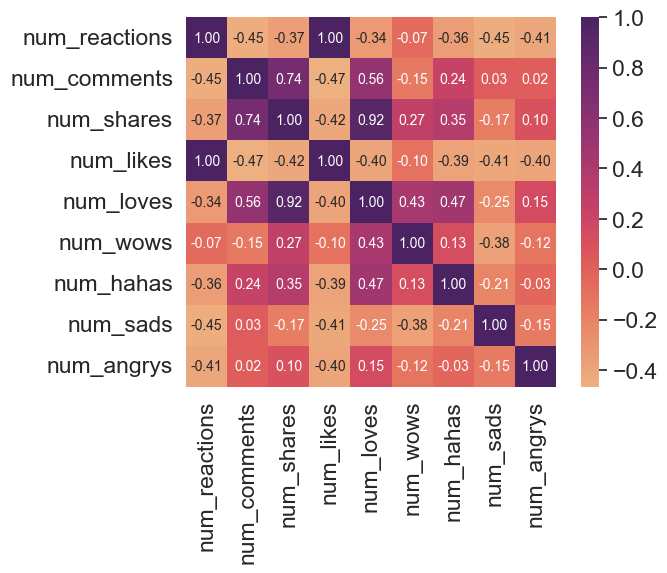

In [47]:
# heatmap of the columns
sns.set(style="whitegrid", context="notebook")
cols = ['num_reactions', 'num_comments', 'num_shares', 'num_likes', 'num_loves', 'num_wows', 'num_hahas', 'num_sads', 'num_angrys']

cm = np.corrcoef(stripped_dataset[cols].values.T)
sns.set(font_scale=1.5)

hm = sns.heatmap(cm,
                 cmap='flare',
                 cbar=True,
                 annot=True,
                 square=True,
                 fmt='.2f',
                 annot_kws={'size': 10},
                 yticklabels=cols,
                 xticklabels=cols)
plt.show()
sns.reset_orig()

#### Density Plot

C:\Users\joshm\AppData\Local\Temp\ipykernel_71912\408708074.py:11: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.kdeplot(stripped_dataset[col], ax=axs[subplot_row, subplot_col], fill=True, palette="mako")
C:\Users\joshm\AppData\Local\Temp\ipykernel_71912\408708074.py:11: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.kdeplot(stripped_dataset[col], ax=axs[subplot_row, subplot_col], fill=True, palette="mako")
C:\Users\joshm\AppData\Local\Temp\ipykernel_71912\408708074.py:11: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.kdeplot(stripped_dataset[col], ax=axs[subplot_row, subplot_col], fill=True, palette="mako")
C:\Users\joshm\AppData\Local\Temp\ipykernel_71912\408708074.py:11: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.kdeplot(stripped_dataset[col], ax=axs[subplot_row, subplot_col], fill=True, palette="mako")
C:\Users\joshm\AppData\Local\Tem

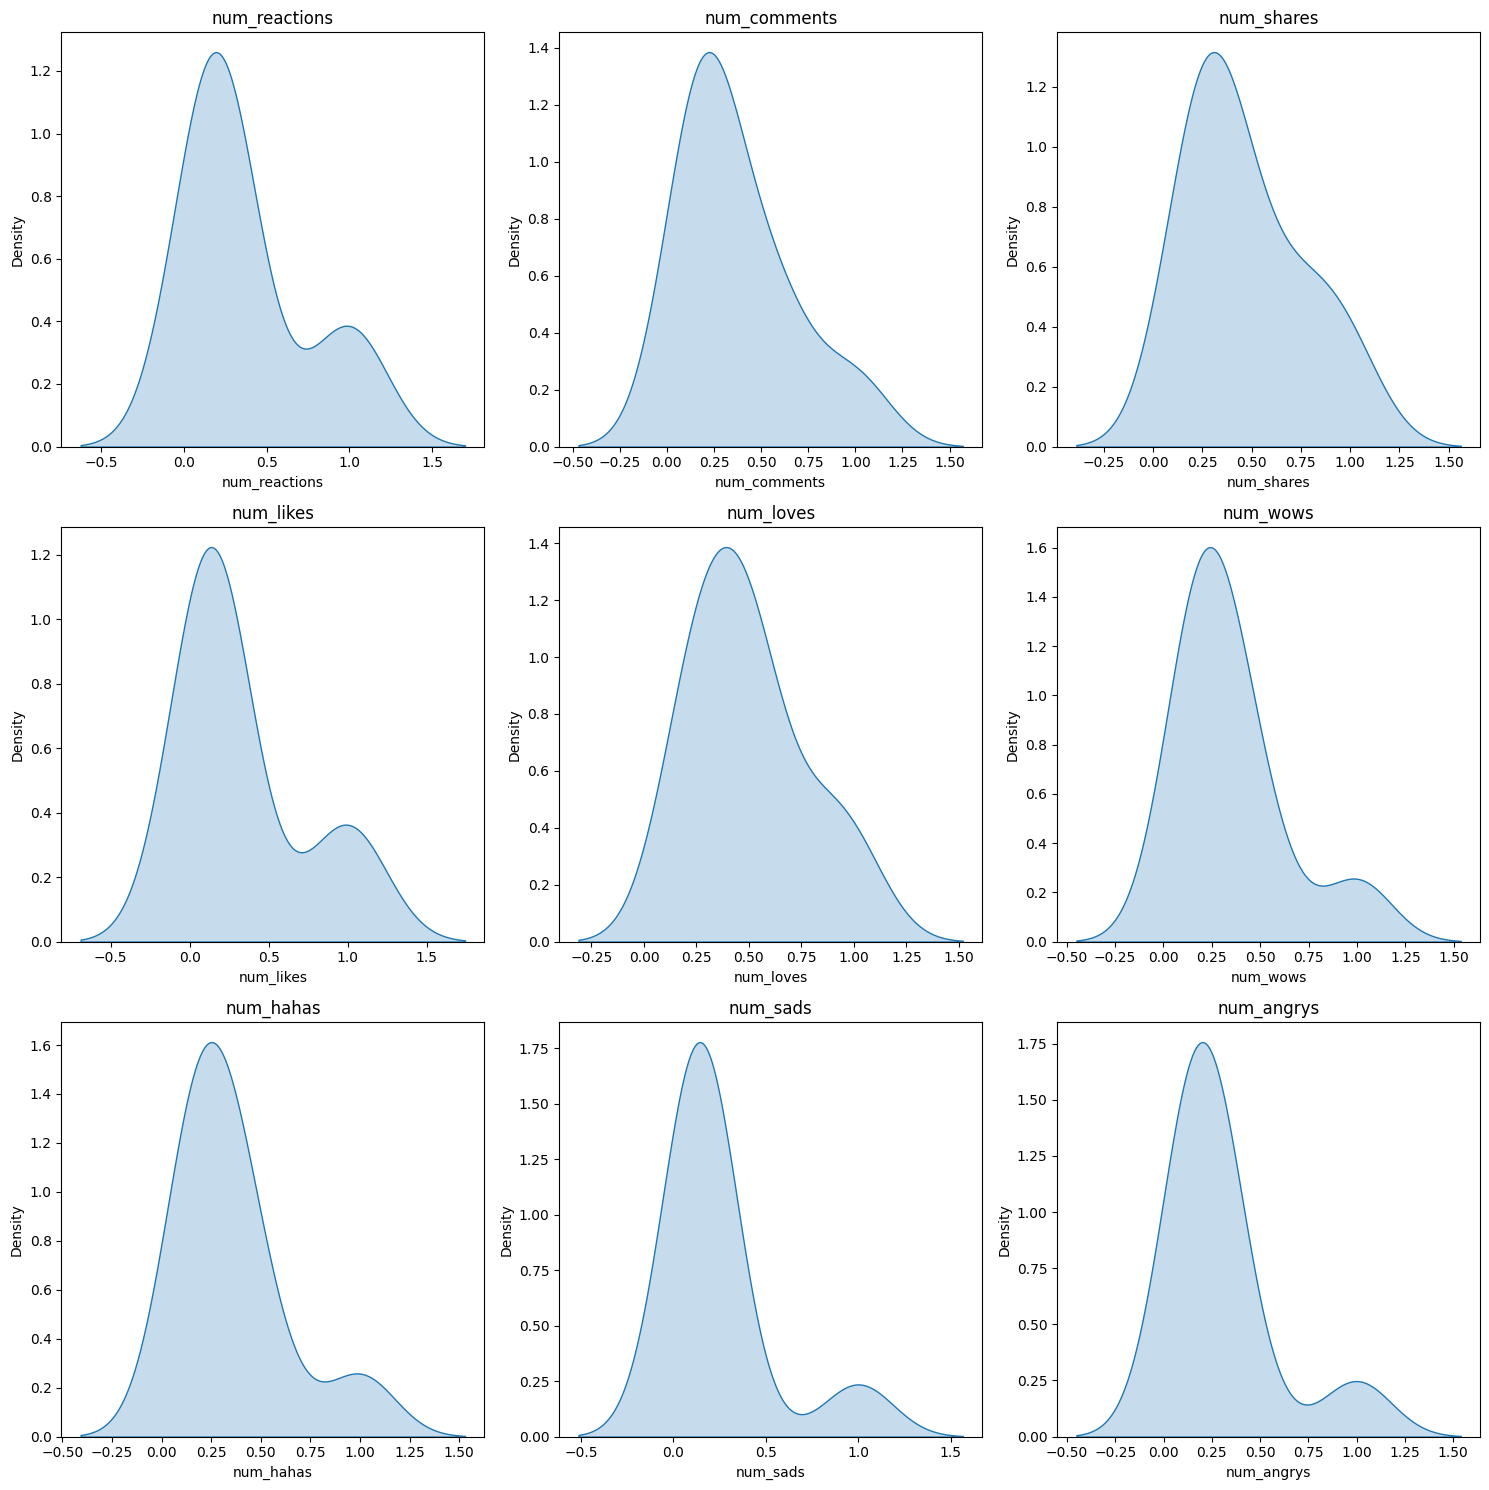

In [68]:
# density plot for columns
# sns.set(style="whitegrid", context="notebook")
# cols = ['num_reactions', 'num_comments', 'num_shares', 'num_likes', 'num_loves', 'num_wows', 'num_hahas', 'num_sads', 'num_angrys']

# sns.kdeplot(data=stripped_dataset[cols], shade=True)
fig, axs = plt.subplots(3, 3, figsize=(15, 15))
subplot_col = 0
subplot_row = 0

for col in stripped_dataset.columns:
    sns.kdeplot(stripped_dataset[col], ax=axs[subplot_row, subplot_col], fill=True, palette="mako")
    axs[subplot_row, subplot_col].set_title(col)
    
    if subplot_col == 2:
        subplot_col = 0
        subplot_row += 1
    else:
        subplot_col += 1

fig.tight_layout()
plt.show()   

#### Box and Whisker Plots

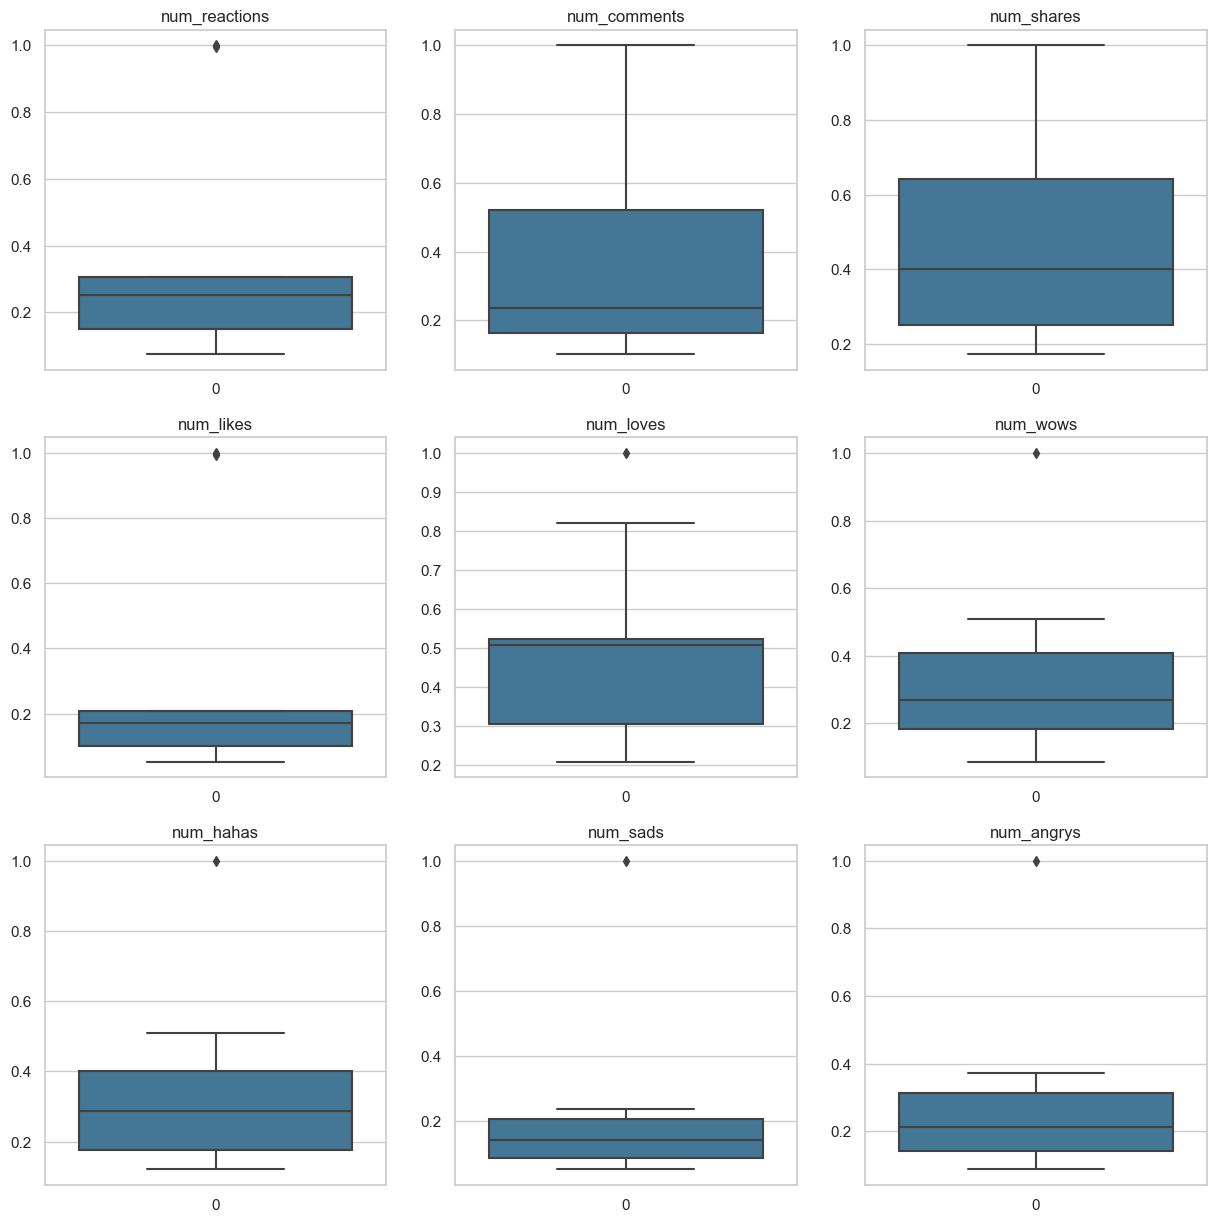

In [78]:
# box and whisker plot for columns
sns.set(style="whitegrid", context="notebook")
cols = ['num_reactions', 'num_comments', 'num_shares', 'num_likes', 'num_loves', 'num_wows', 'num_hahas', 'num_sads', 'num_angrys']
fig, axs = plt.subplots(3, 3, figsize=(15, 15))
subplot_col = 0
subplot_row = 0

for col in stripped_dataset.columns:
    sns.boxplot(stripped_dataset[col], ax=axs[subplot_row, subplot_col], palette="mako")
    axs[subplot_row, subplot_col].set_title(col)
    
    if subplot_col == 2:
        subplot_col = 0
        subplot_row += 1
    else:
        subplot_col += 1

#### Histograms

C:\Users\joshm\AppData\Local\Temp\ipykernel_71912\2588060802.py:9: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.histplot(stripped_dataset[col], ax=axs[subplot_row, subplot_col], palette="mako")
C:\Users\joshm\AppData\Local\Temp\ipykernel_71912\2588060802.py:9: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.histplot(stripped_dataset[col], ax=axs[subplot_row, subplot_col], palette="mako")
C:\Users\joshm\AppData\Local\Temp\ipykernel_71912\2588060802.py:9: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.histplot(stripped_dataset[col], ax=axs[subplot_row, subplot_col], palette="mako")
C:\Users\joshm\AppData\Local\Temp\ipykernel_71912\2588060802.py:9: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.histplot(stripped_dataset[col], ax=axs[subplot_row, subplot_col], palette="mako")
C:\Users\joshm\AppData\Local\Temp\ipykernel_71912\2588060802.py:9: UserW

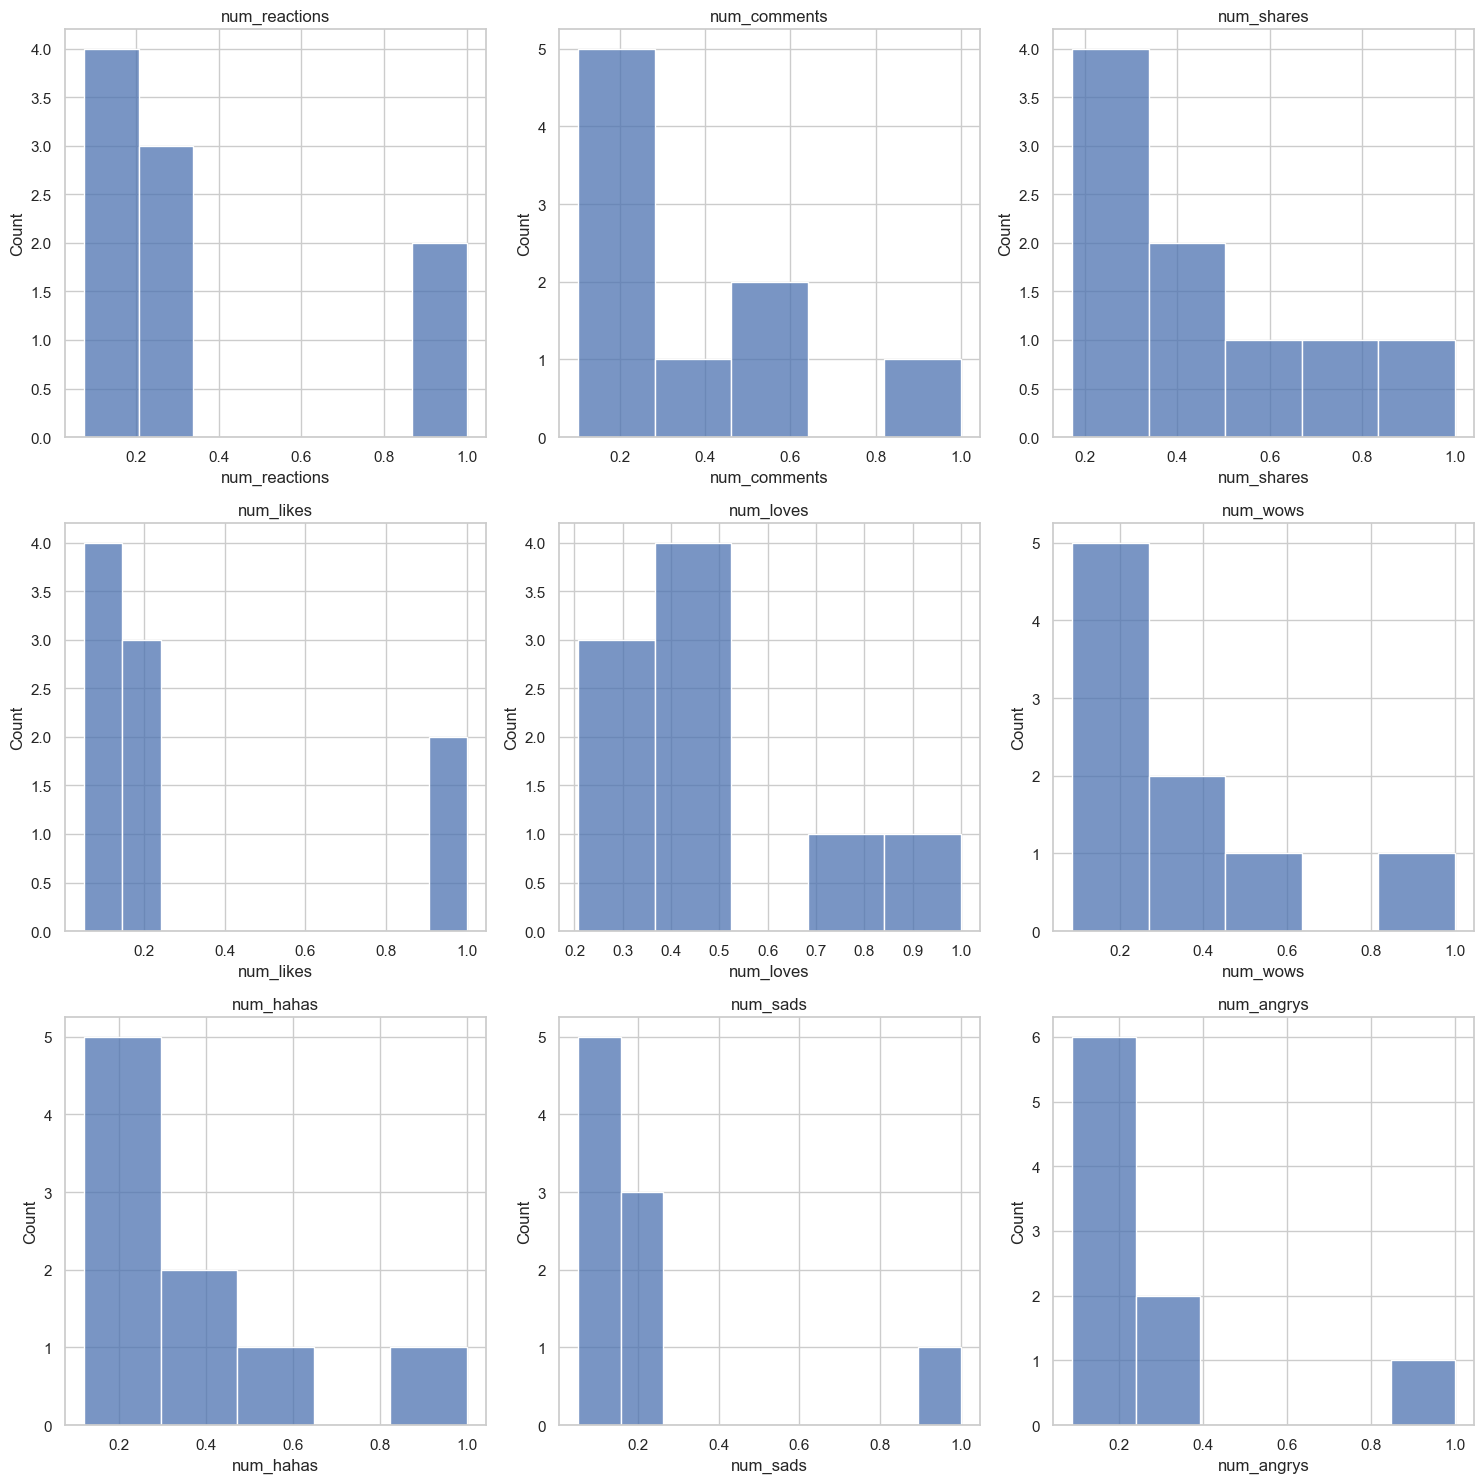

In [79]:
# histogram for columns
sns.set(style="whitegrid", context="notebook")
cols = ['num_reactions', 'num_comments', 'num_shares', 'num_likes', 'num_loves', 'num_wows', 'num_hahas', 'num_sads', 'num_angrys']
fig, axs = plt.subplots(3, 3, figsize=(15, 15))
subplot_col = 0
subplot_row = 0

for col in stripped_dataset.columns:
    sns.histplot(stripped_dataset[col], ax=axs[subplot_row, subplot_col], palette="mako")
    axs[subplot_row, subplot_col].set_title(col)
    
    if subplot_col == 2:
        subplot_col = 0
        subplot_row += 1
    else:
        subplot_col += 1

fig.tight_layout()
plt.show()

#### Correlation Matrix

In [80]:
# correlation matrix for columns
corr_matrix = stripped_dataset.corr()
# make pretty seaborn plot of correlation matrix
